<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [46]:
import pandas as pd
import numpy as np
import pandas as pd
import math
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

sns.set_context("poster")
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style("whitegrid")

%matplotlib inline


### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [4]:
# Read CSV
house_csv = pd.read_csv("C:/Users/Travel Your Style/Documents/IOD Course 22 June 20/DATA/Sacramento_transactions.csv")

In [5]:
house_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [6]:
house_csv.shape


(985, 12)

In [7]:
house_csv.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [8]:
house_csv.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [9]:
house_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [19]:
# Sale Date is Object - convert to date time series 
house_csv['sale_date'] = pd.to_datetime(house_csv['sale_date'],format = '%d:%m:%y')

ValueError: time data 'Wed May 21 00:00:00 EDT 2008' does not match format '%d:%m:%y' (match)

In [10]:
house_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
zip,985.0,95750.697462,85.176072,95603.000000,95660.000000,95762.000000,95828.000000,95864.000000
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [21]:
# min value for bedrooms as Zero! Is this correct?
house_csv[house_csv['beds'] ==0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


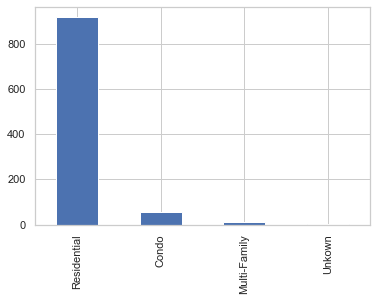

In [22]:
# Types of Data
house_csv['type'].value_counts().plot(kind='bar')

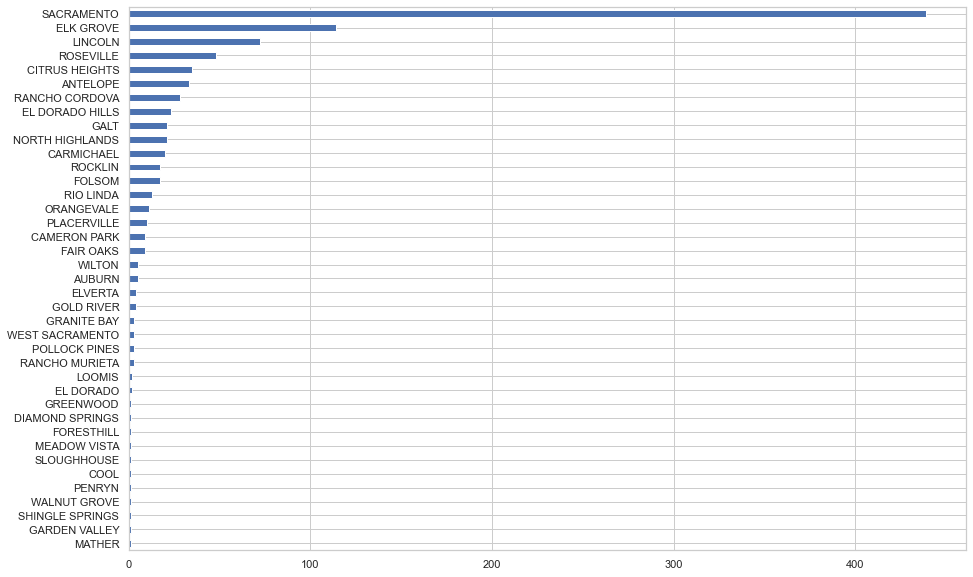

In [23]:
# Look at Cities...
house_csv['city'].value_counts().sort_values().plot(kind='barh', figsize=(15,10))

In [59]:
# import the library
import folium
import pandas as pd

# Make an empty map
def generateBaseMap(default_location=[38.575764, -121.478851], default_zoom_start=10):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start)
    return base_map

# 37.76, -122.45 is the initital location of SF, USA


base_map= generateBaseMap(default_location=[38.575764, -121.478851])

# I can add circle/marker one by one on the map
for i in range(0, len(house_csv.head(1000))):
    folium.Marker(
        location=[house_csv.iloc[i]['latitude'], house_csv.iloc[i]['longitude']]).add_to(base_map)
    
display(base_map)

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [31]:
# ANSWER
#Price - is the dependent variable. Can try to predict price based on other variables

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [64]:
# ANSWER - Beds, Baths, Sqft, Type

#Use scatter plot to check



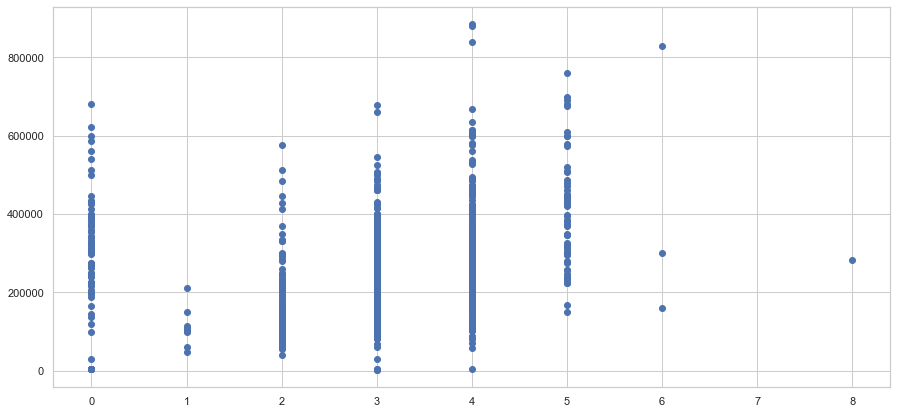

In [63]:
# beds
draw_scatter_plot(house_csv['beds'], house_csv['price'])
plt.show()

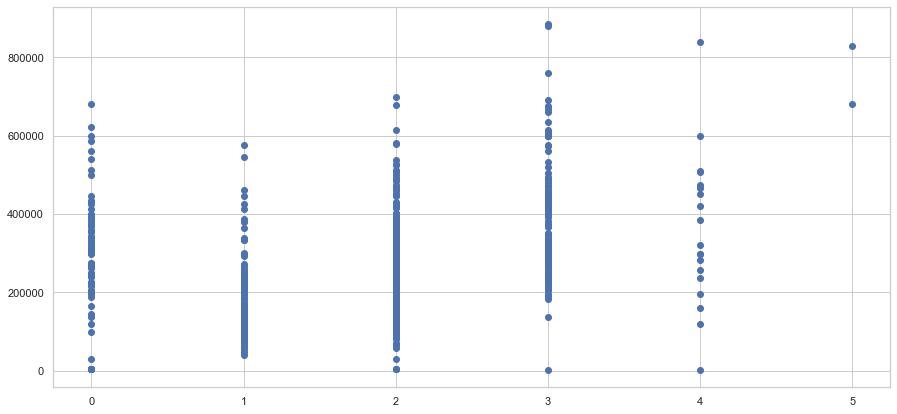

In [66]:
# baths
draw_scatter_plot(house_csv['baths'], house_csv['price'])
plt.show()

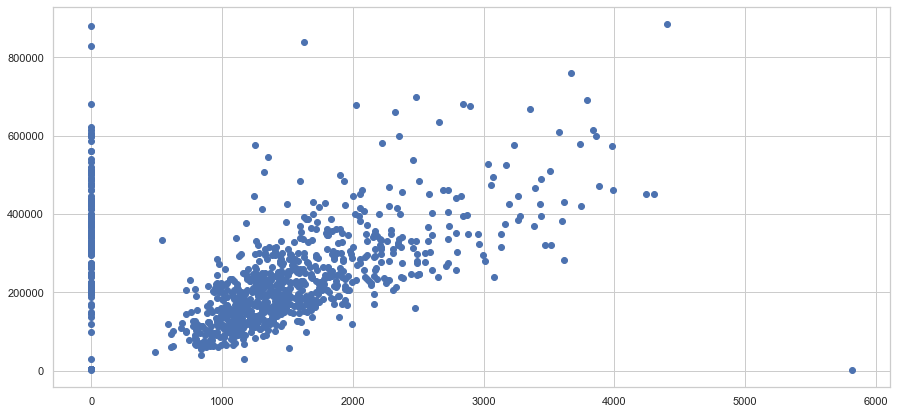

In [68]:
# sq_ft
draw_scatter_plot(house_csv['sq__ft'], house_csv['price'])
plt.show()

#### 2.2 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [69]:
# ANSWER
house_csv.corr()

#sq_ft has a strong correlation to price, as does number of bathrooms and bedrooms

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


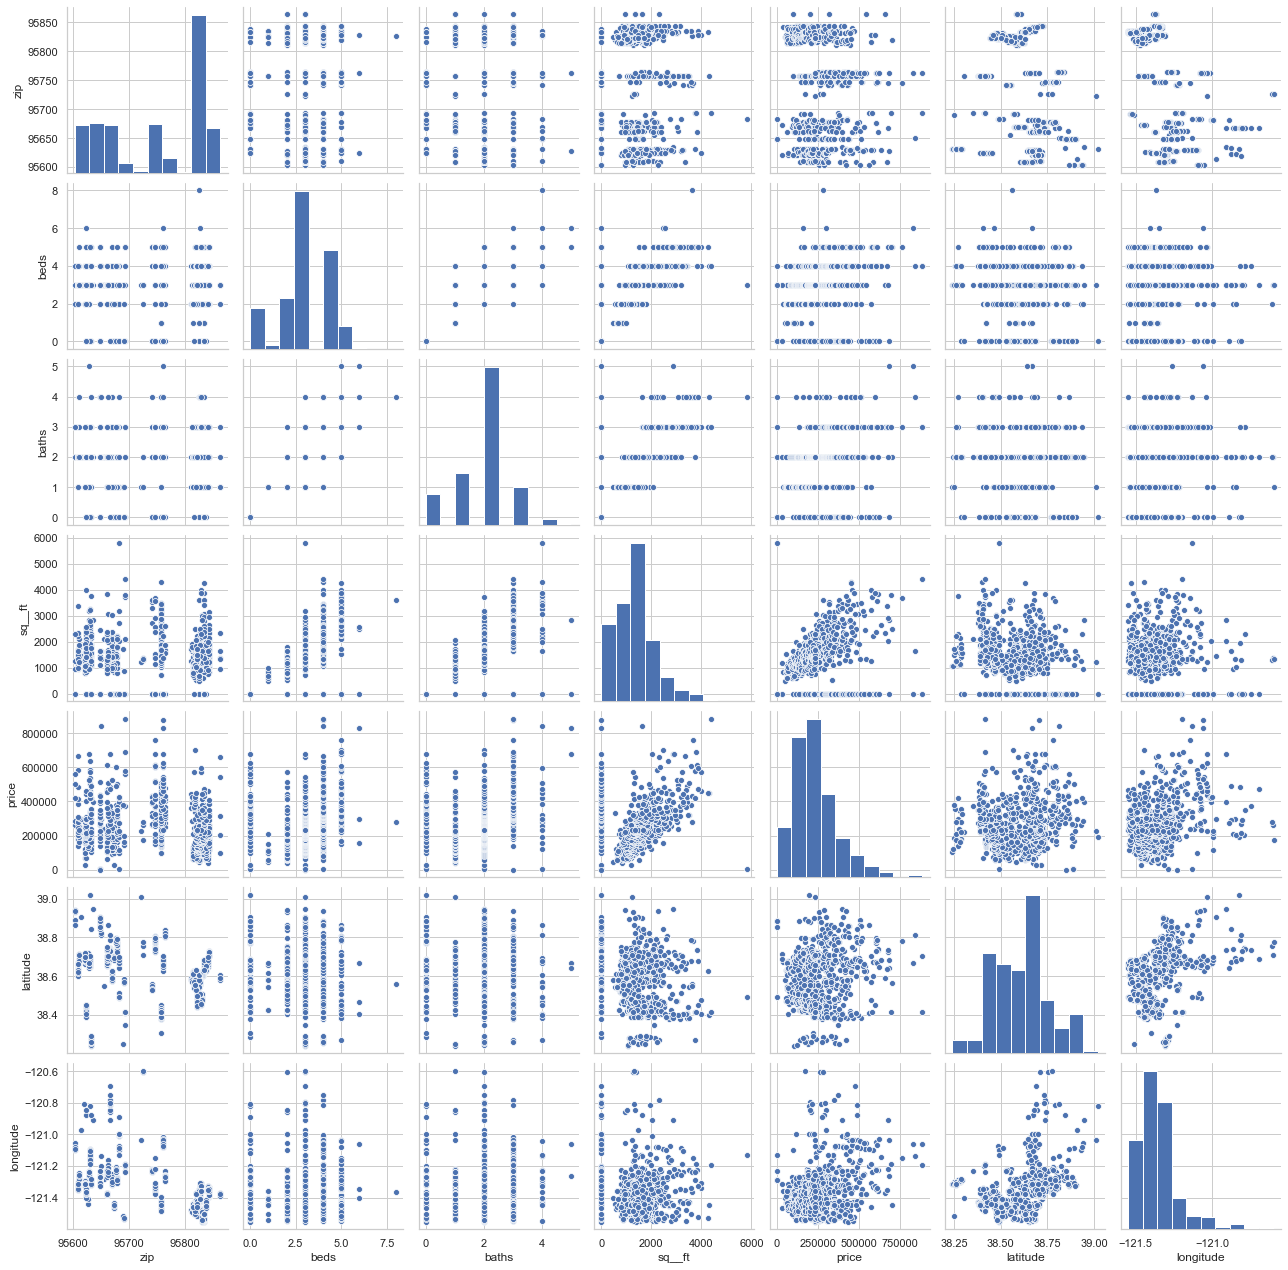

In [71]:
sns.pairplot(house_csv)

#### 2.3 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
# ANSWER

X = house_csv['sq__ft'].values.reshape(-1,1)
Y = house_csv['price']
linreg = LinearRegression()
linreg.fit(X, Y)

print(linreg.coef_, linreg.intercept_)

[54.15863969] 162930.16140699777


##### 2.3.1 Fit predictor and target variables using linear regression 

##### 2.3.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [36]:
# ANSWER

### 3. Splitting Data

In [37]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [38]:
# ANSWER
## Create training and testing subsets

#### 3.2 Check Shape, Sample of Test Train Data

In [39]:
# ANSWER
## Check training/test data

#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using x_test, y_test

In [40]:
# ANSWER

In [41]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [42]:
# ANSWER



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



